In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load the dataset
file_path = r'C:\Users\aayus\.conda\envs\datascience\iris\IRIS.csv'
iris_data = pd.read_csv(file_path)

In [3]:
# Split the dataset into features (X) and target (y)
X = iris_data.drop('species', axis=1)
y = iris_data['species']

In [4]:
# Encode the target labels (species) to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [5]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [6]:
# Train a RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

In [8]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

Accuracy of the model: 100.00%


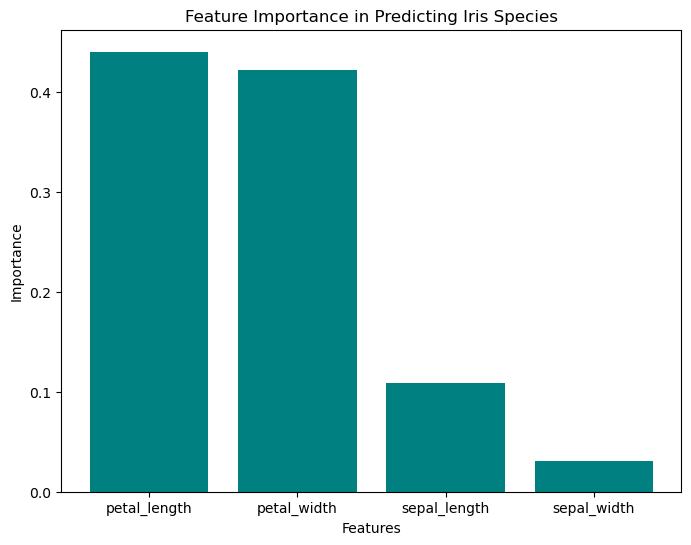

In [9]:
# Plot Feature Importance
importances = clf.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(8, 6))
plt.bar(features[indices], importances[indices], color='teal')
plt.title("Feature Importance in Predicting Iris Species")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

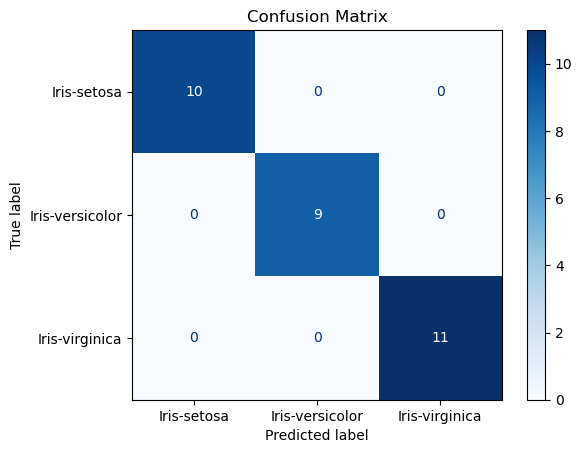

In [10]:
# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

In [11]:
# Example flower characteristics
sample = [[5.1, 3.5, 1.4, 0.2]]  # Sepal Length, Sepal Width, Petal Length, Petal Width

In [12]:
# Convert sample to a DataFrame with the correct feature names
sample = pd.DataFrame(sample, columns=X.columns)

# Predict the species
sample_prediction = clf.predict(sample)
predicted_species = label_encoder.inverse_transform(sample_prediction)

print(f"The predicted species for the sample is: {predicted_species[0]}")

The predicted species for the sample is: Iris-setosa
